In [0]:
# setup
!wget https://swcarpentry.github.io/python-novice-inflammation/data/python-novice-inflammation-data.zip
!wget https://swcarpentry.github.io/python-novice-inflammation/code/python-novice-inflammation-code.zip

!unzip -jn python-novice-inflammation-data.zip
!unzip -jn python-novice-inflammation-code.zip

All materials are from [Software Carpentry Lesson 8](https://swcarpentry.github.io/python-novice-inflammation/08-func/index.html)
# Creating Functions
At this point, we’ve written code to draw some interesting features in our inflammation data, loop over all our data files to quickly draw these plots for each of them, and have Python make decisions based on what it sees in our data. But, our code is getting pretty long and complicated; what if we had thousands of datasets, and didn’t want to generate a figure for every single one? Commenting out the figure-drawing code is a nuisance. Also, what if we want to use that code again, on a different dataset or at a different point in our program? Cutting and pasting it is going to make our code get very long and very repetitive, very quickly. We’d like a way to package our code so that it is easier to reuse, and Python provides for this by letting us define things called ‘functions’ — a shorthand way of re-executing longer pieces of code. Let’s start by defining a function `fahr_to_celsius` that converts temperatures from Fahrenheit to Celsius:

In [0]:
def fahr_to_celsius(temp):
    return ((temp - 32) * (5/9))

![alt text](https://swcarpentry.github.io/python-novice-inflammation/fig/python-function.svg)

The function definition opens with the keyword `def` followed by the name of the function (`fahr_to_celsius`) and a parenthesized list of parameter names (`temp`). The [body](https://swcarpentry.github.io/python-novice-inflammation/reference/#body) of the function — the statements that are executed when it runs — is indented below the definition line. The body concludes with a `return` keyword followed by the return value.

When we call the function, the values we pass to it are assigned to those variables so that we can use them inside the function. Inside the function, we use a [return statement](https://swcarpentry.github.io/python-novice-inflammation/reference/#return-statement) to send a result back to whoever asked for it.

Let’s try running our function.

In [0]:
fahr_to_celsius(32)

0.0

This command should call our function, using “32” as the input and return the function value.

In fact, calling our own function is no different from calling any other function:

In [0]:
print('freezing point of water:', fahr_to_celsius(32), 'C')
print('boiling point of water:', fahr_to_celsius(212), 'C')

freezing point of water: 0.0 C
boiling point of water: 100.0 C


We’ve successfully called the function that we defined, and we have access to the value that we returned.

## Composing Functions
Now that we’ve seen how to turn Fahrenheit into Celsius, we can also write the function to turn Celsius into Kelvin:

In [0]:
def celsius_to_kelvin(temp_c):
    return temp_c + 273.15

print('freezing point of water in Kelvin:', celsius_to_kelvin(0))

freezing point of water in Kelvin: 273.15


What about converting Fahrenheit to Kelvin? We could write out the formula, but we don’t need to. Instead, we can [compose](https://swcarpentry.github.io/python-novice-inflammation/reference/#compose) the two functions we have already created:

In [0]:
def fahr_to_kelvin(temp_f):
    temp_c = fahr_to_celsius(temp_f)
    temp_k = celsius_to_kelvin(temp_c)
    return temp_k

print('boiling point of water in Kelvin:', fahr_to_kelvin(212.0))

boiling point of water in Kelvin: 373.15


This is our first taste of how larger programs are built: we define basic operations, then combine them in ever-larger chunks to get the effect we want. Real-life functions will usually be larger than the ones shown here — typically half a dozen to a few dozen lines — but they shouldn’t ever be much longer than that, or the next person who reads it won’t be able to understand what’s going on.
## Tidying up
Now that we know how to wrap bits of code up in functions, we can make our inflammation analysis easier to read and easier to reuse. First, let’s make a `visualize` function that generates our plots:

In [0]:
def visualize(filename):

    data = numpy.loadtxt(fname=filename, delimiter=',')

    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(numpy.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(numpy.max(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(numpy.min(data, axis=0))

    fig.tight_layout()
    matplotlib.pyplot.show()

and another function called `detect_problems` that checks for those systematics we noticed:

In [0]:
def detect_problems(filename):

    data = numpy.loadtxt(fname=filename, delimiter=',')

    if numpy.max(data, axis=0)[0] == 0 and numpy.max(data, axis=0)[20] == 20:
        print('Suspicious looking maxima!')
    elif numpy.sum(numpy.min(data, axis=0)) == 0:
        print('Minima add up to zero!')
    else:
        print('Seems OK!')

Wait! Didn’t we forget to specify what both of these functions should return? Well, we didn’t. In Python, functions are not required to include a `return` statement and can be used for the sole purpose of grouping together pieces of code that conceptually do one thing. In such cases, function names usually describe what they do, e.g. `visualize`, `detect_problems`.

Notice that rather than jumbling this code together in one giant `for` loop, we can now read and reuse both ideas separately. We can reproduce the previous analysis with a much simpler `for` loop:

inflammation-01.csv


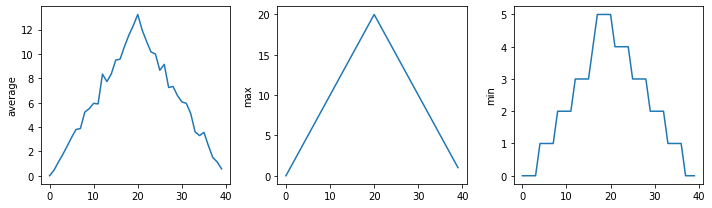

Suspicious looking maxima!
inflammation-02.csv


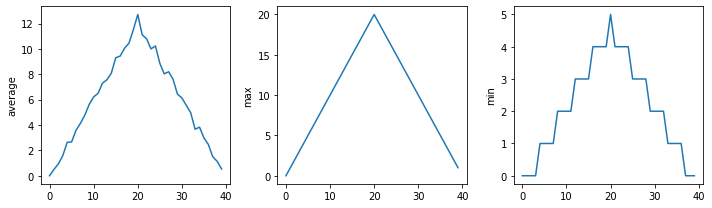

Suspicious looking maxima!
inflammation-03.csv


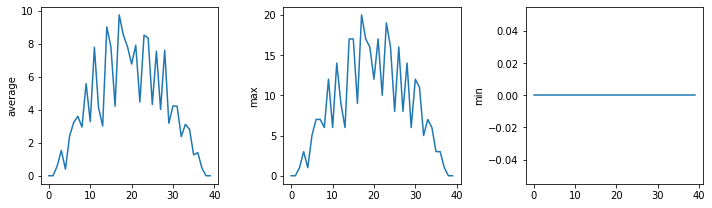

Minima add up to zero!


In [0]:
import glob
import matplotlib

filenames = sorted(glob.glob('inflammation*.csv'))

for filename in filenames[:3]:
    print(filename)
    visualize(filename)
    detect_problems(filename)

By giving our functions human-readable names, we can more easily read and understand what is happening in the `for` loop. Even better, if at some later date we want to use either of those pieces of code again, we can do so in a single line.

## Testing and Documenting

Once we start putting things in functions so that we can re-use them, we need to start testing that those functions are working correctly. To see how to do this, let’s write a function to offset a dataset so that it’s mean value shifts to a user-defined value:



In [0]:
def offset_mean(data, target_mean_value):
    return (data - numpy.mean(data)) + target_mean_value

We could test this on our actual data, but since we don’t know what the values ought to be, it will be hard to tell if the result was correct. Instead, let’s use NumPy to create a matrix of 0’s and then offset its values to have a mean value of 3:



In [0]:
import numpy

z = numpy.zeros((2,2))
print(offset_mean(z, 3))

[[3. 3.]
 [3. 3.]]


That looks right, so let’s try offset_mean on our real data:



In [0]:
data = numpy.loadtxt(fname='inflammation-01.csv', delimiter=',')
print(offset_mean(data, 0))

[[-6.14875 -6.14875 -5.14875 ... -3.14875 -6.14875 -6.14875]
 [-6.14875 -5.14875 -4.14875 ... -5.14875 -6.14875 -5.14875]
 [-6.14875 -5.14875 -5.14875 ... -4.14875 -5.14875 -5.14875]
 ...
 [-6.14875 -5.14875 -5.14875 ... -5.14875 -5.14875 -5.14875]
 [-6.14875 -6.14875 -6.14875 ... -6.14875 -4.14875 -6.14875]
 [-6.14875 -6.14875 -5.14875 ... -5.14875 -5.14875 -6.14875]]


It’s hard to tell from the default output whether the result is correct, but there are a few tests that we can run to reassure us:

In [0]:
print('original min, mean, and max are:', numpy.min(data), numpy.mean(data), numpy.max(data))
offset_data = offset_mean(data, 0)
print('min, mean, and max of offset data are:',
      numpy.min(offset_data),
      numpy.mean(offset_data),
      numpy.max(offset_data))

original min, mean, and max are: 0.0 6.14875 20.0
min, mean, and max of offset data are: -6.14875 2.842170943040401e-16 13.85125


That seems almost right: the original mean was about 6.1, so the lower bound from zero is now about -6.1. The mean of the offset data isn’t quite zero — we’ll explore why not in the challenges — but it’s pretty close. We can even go further and check that the standard deviation hasn’t changed:

In [0]:
print('std dev before and after:', numpy.std(data), numpy.std(offset_data))

std dev before and after: 4.613833197118566 4.613833197118566


Those values look the same, but we probably wouldn’t notice if they were different in the sixth decimal place. Let’s do this instead:

In [0]:
print('difference in standard deviations before and after:',
      numpy.std(data) - numpy.std(offset_data))

difference in standard deviations before and after: 0.0


Again, the difference is very small. It’s still possible that our function is wrong, but it seems unlikely enough that we should probably get back to doing our analysis. We have one more task first, though: we should write some [documentation](https://swcarpentry.github.io/python-novice-inflammation/reference/#documentation) for our function to remind ourselves later what it’s for and how to use it.

The usual way to put documentation in software is to add [comments](https://swcarpentry.github.io/python-novice-inflammation/reference/#comment) like this:

In [0]:
# offset_mean(data, target_mean_value):
# return a new array containing the original data with its mean offset to match the desired value.
def offset_mean(data, target_mean_value):
    return (data - numpy.mean(data)) + target_mean_value

There’s a better way, though. If the first thing in a function is a string that isn’t assigned to a variable, that string is attached to the function as its documentation:

In [0]:
def offset_mean(data, target_mean_value):
    '''Return a new array containing the original data
       with its mean offset to match the desired value.'''
    return (data - numpy.mean(data)) + target_mean_value

This is better because we can now ask Python’s built-in help system to show us the documentation for the function:

In [0]:
help(offset_mean)

Help on function offset_mean in module __main__:

offset_mean(data, target_mean_value)
    Return a new array containing the original data
    with its mean offset to match the desired value.



A string like this is called a [docstring](https://swcarpentry.github.io/python-novice-inflammation/reference/#docstring). We don’t need to use triple quotes when we write one, but if we do, we can break the string across multiple lines:

In [0]:
def offset_mean(data, target_mean_value):
    '''Return a new array containing the original data
       with its mean offset to match the desired value.

    Examples
    --------
    >>> offset_mean([1, 2, 3], 0)
    array([-1.,  0.,  1.])
    '''
    return (data - numpy.mean(data)) + target_mean_value

help(offset_mean)

Help on function offset_mean in module __main__:

offset_mean(data, target_mean_value)
    Return a new array containing the original data
       with its mean offset to match the desired value.
    
    Examples
    --------
    >>> offset_mean([1, 2, 3], 0)
    array([-1.,  0.,  1.])



## Defining Defaults
We have passed parameters to functions in two ways: directly, as in `type(data)`, and by name, as in `numpy.loadtxt(fname='something.csv', delimiter=',')`. In fact, we can pass the filename to `loadtxt` without the `fname=`:

In [0]:
numpy.loadtxt('inflammation-01.csv', delimiter=',')

array([[0., 0., 1., ..., 3., 0., 0.],
       [0., 1., 2., ..., 1., 0., 1.],
       [0., 1., 1., ..., 2., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

but we still need to say `delimiter=:`

In [0]:
numpy.loadtxt('inflammation-01.csv', ',')

SyntaxError: ignored

To understand what’s going on, and make our own functions easier to use, let’s re-define our `offset_mean` function like this:

In [0]:
def offset_mean(data, target_mean_value=0.0):
    '''Return a new array containing the original data
       with its mean offset to match the desired value, (0 by default).

    Examples
    --------
    >>> offset_mean([1, 2, 3])
    array([-1.,  0.,  1.])
    '''
    return (data - numpy.mean(data)) + target_mean_value

The key change is that the second parameter is now written `target_mean_value=0.0` instead of just `target_mean_value`. If we call the function with two arguments, it works as it did before:

In [0]:
test_data = numpy.zeros((2, 2))
print(offset_mean(test_data, 3))

[[3. 3.]
 [3. 3.]]


But we can also now call it with just one parameter, in which case `target_mean_value` is automatically assigned the [default value](https://swcarpentry.github.io/python-novice-inflammation/reference/#default-value) of 0.0:

In [0]:
more_data = 5 + numpy.zeros((2, 2))
print('data before mean offset:')
print(more_data)
print('offset data:')
print(offset_mean(more_data))

data before mean offset:
[[5. 5.]
 [5. 5.]]
offset data:
[[0. 0.]
 [0. 0.]]


This is handy: if we usually want a function to work one way, but occasionally need it to do something else, we can allow people to pass a parameter when they need to but provide a default to make the normal case easier. The example below shows how Python matches values to parameters:

In [0]:
def display(a=1, b=2, c=3):
    print('a:', a, 'b:', b, 'c:', c)

print('no parameters:')
display()
print('one parameter:')
display(55)
print('two parameters:')
display(55, 66)

no parameters:
a: 1 b: 2 c: 3
one parameter:
a: 55 b: 2 c: 3
two parameters:
a: 55 b: 66 c: 3


As this example shows, parameters are matched up from left to right, and any that haven’t been given a value explicitly get their default value. We can override this behavior by naming the value as we pass it in:

In [0]:
print('only setting the value of c')
display(c=77)

only setting the value of c
a: 1 b: 2 c: 77


With that in hand, let’s look at the help for `numpy.loadtxt`:

In [0]:
help(numpy.loadtxt)

Help on function loadtxt in module numpy:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None)
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file, str, or pathlib.Path
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    comments : str or sequence of str, optional
        The char

There’s a lot of information here, but the most important part is the first couple of lines:

`loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, use
cols=None, unpack=False, ndmin=0, encoding='bytes')`

This tells us that `loadtxt` has one parameter called `fname` that doesn’t have a default value, and eight others that do. If we call the function like this:

In [0]:
numpy.loadtxt('inflammation-01.csv', ',')

SyntaxError: ignored

then the filename is assigned to fname (which is what we want), but the delimiter string ',' is assigned to dtype rather than delimiter, because dtype is the second parameter in the list. However ',' isn’t a known dtype so our code produced an error message when we tried to run it. When we call loadtxt we don’t have to provide fname= for the filename because it’s the first item in the list, but if we want the ',' to be assigned to the variable delimiter, we do have to provide delimiter= for the second parameter since delimiter is not the second parameter in the list.

## Readable functions
Consider these two functions:

In [0]:
def s(p):
    a = 0
    for v in p:
        a += v
    m = a / len(p)
    d = 0
    for v in p:
        d += (v - m) * (v - m)
    return numpy.sqrt(d / (len(p) - 1))

def std_dev(sample):
    sample_sum = 0
    for value in sample:
        sample_sum += value

    sample_mean = sample_sum / len(sample)

    sum_squared_devs = 0
    for value in sample:
        sum_squared_devs += (value - sample_mean) * (value - sample_mean)

    return numpy.sqrt(sum_squared_devs / (len(sample) - 1))

The functions `s` and `std_dev` are computationally equivalent (they both calculate the sample standard deviation), but to a human reader, they look very different. You probably found `std_dev` much easier to read and understand than `s`.

As this example illustrates, both documentation and a programmer’s *coding style* combine to determine how easy it is for others to read and understand the programmer’s code. Choosing meaningful variable names and using blank spaces to break the code into logical “chunks” are helpful techniques for producing readable code. This is useful not only for sharing code with others, but also for the original programmer. If you need to revisit code that you wrote months ago and haven’t thought about since then, you will appreciate the value of readable code!

## Exercise: Combining Strings
“Adding” two strings produces their concatenation: `'a' + 'b'` is `'ab'`. Write a function called `fence` that takes two parameters called `original` and `wrapper` and returns a new string that has the wrapper character at the beginning and end of the original. A call to your function should look like this:


In [0]:
print(fence('name', '*'))

## Exercise: Return versus print
Note that return and print are not interchangeable. print is a Python function that prints data to the screen. It enables us, users, see the data. return statement, on the other hand, makes data visible to the program. Let’s have a look at the following function:

```
def add(a, b):
    print(a + b)    
```

Question: What will we see if we execute the following commands?

```
A = add(7, 3)
print(A)
```

## Exercise: Selecting Characters From Strings
If the variable `s` refers to a string, then `s[0]` is the string’s first character and `s[-1]` is its last. Write a function called `outer` that returns a string made up of just the first and last characters of its input. A call to your function should look like this:



```
print(outer('helium'))
```



## Exercise: Rescaling an Array
Write a function `rescale` that takes an array as input and returns a corresponding array of values scaled to lie in the range 0.0 to 1.0. (Hint: If `L` and `H` are the lowest and highest values in the original array, then the replacement for a value v should be `(v-L) / (H-L)`.)



## Exercise: Testing and Documenting Your Function
Run the commands `help(numpy.arange)` and `help(numpy.linspace)` to see how to use these functions to generate regularly-spaced values, then use those values to test your `rescale` function. Once you’ve successfully tested your function, add a docstring that explains what it does.



## Exercise: Defining Defaults
Rewrite the `rescale` function so that it scales data to lie between `0.0` and `1.0` by default, but will allow the caller to specify lower and upper bounds if they want. Compare your implementation to your neighbor’s: do the two functions always behave the same way?

## Exercise: Variables Inside and Outside Functions
What does the following piece of code display when run — and why?


In [0]:
f = 0
k = 0

def f2k(f):
    k = ((f-32)*(5.0/9.0)) + 273.15
    return k

f2k(8)
f2k(41)
f2k(32)

print(k)

## Exercise: Mixing Default and Non-Default Parameters
Given the following code:

```
def numbers(one, two=2, three, four=4):
    n = str(one) + str(two) + str(three) + str(four)
    return n

print(numbers(1, three=3))
```
what do you expect will be printed? What is actually printed? What rule do you think Python is following?

1. 1234
2. one2three4
3. 1239
4. SyntaxError

Given that, what does the following piece of code display when run?

1. a: b: 3 c: 6
2. a: -1 b: 3 c: 6
3. a: -1 b: 2 c: 6
4. a: b: -1 c: 2


## Exercise: The Old Switcheroo
Consider this code:



In [0]:
a = 3
b = 7

def swap(a, b):
    temp = a
    a = b
    b = temp

swap(a, b)

print(a, b)

Which of the following would be printed if you were to run this code? Why did you pick this answer?

1. 7 3
2. 3 7
3. 3 3
4. 7 7

## Exercise: Readable Code
Revise a function you wrote for one of the previous exercises to try to make the code more readable. Then, collaborate with one of your neighbors to critique each other’s functions and discuss how your function implementations could be further improved to make them more readable.

## Key Points:

* Define a function using `def function_name(parameter)`.

* The body of a function must be indented.

* Call a function using `function_name(value`).

* Numbers are stored as integers or floating-point numbers.

* Variables defined within a function can only be seen and used within the body of the function.

* If a variable is not defined within the function it is used, Python looks for a definition before the function call

* Use `help(thing)` to view help for something.

* Put docstrings in functions to provide help for that function.

* Specify default values for parameters when defining a function using `name=value` in the parameter list.

* Parameters can be passed by matching based on name, by position, or by omitting them (in which case the default value is used).

* Put code whose parameters change frequently in a function, then call it with different parameter values to customize its behavior.

